In [23]:
%run Model.ipynb

nadh_c + succoa_c --> coa_c + h_c + nad_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
9.605894736842117
Uptake: -10.0
Yield for model SucD = 0.9605894736842118
akg_c --> co2_c + succinyl_semialdehyde_c
nadh_c + succinyl_semialdehyde_c --> four_hydroxybutyrate_c + h_c + nad_c
accoa_c + four_hydroxybutyrate_c --> ac_c + four_hbcoa_c
four_hbcoa_c + nadh_c --> coa_c + four_hbaldehyde_c + h_c + nad_c
four_hbaldehyde_c + nadh_c --> bdo_c + h_c + nad_c
9.708085106382972
Uptake: -10.0
Yield for model Akg = 0.9708085106382972


In [24]:
model_sucd.optimize()

,fluxes,reduced_costs
CYTDK2,0.00000,-7.273028e-17
XPPT,0.00000,-1.504671e-02
HXPRT,0.00000,-1.504671e-02
NDPK5,0.00000,-0.000000e+00
SHK3Dr,0.33424,0.000000e+00
...,...,...
HBCT,0.00000,0.000000e+00
HBCR,0.00000,0.000000e+00
ADH,0.00000,-1.170938e-17
EX_bdo,0.00000,0.000000e+00


In [25]:
model_akg.optimize()

,fluxes,reduced_costs
CYTDK2,0.000000,-2.220446e-16
XPPT,0.000000,-1.702128e-01
HXPRT,0.000000,-1.702128e-01
NDPK5,0.000000,-1.927880e-16
SHK3Dr,0.000000,-0.000000e+00
...,...,...
HBCT,9.708085,5.551115e-17
HBCR,9.708085,-9.992007e-16
ADH,9.708085,-1.301043e-16
EX_bdo,9.708085,0.000000e+00


# Biomass growth

## Substrate: glucose

The biomass growth of the sucd model is calculated with substrate glucose

In [26]:
# model:sucd
medium = model_sucd.medium
with model_sucd:
    medium['EX_glc__D_e'] = 10
    medium['EX_xyl__D_e'] = 0
    model_sucd.medium = medium
    solution = model_sucd.optimize()
    print(solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])

0.8769972144269966


The biomass growth of the akg model is calculated with substrate glucose

In [27]:
# model:akg
medium = model_akg.medium
with model_akg:
    medium['EX_glc__D_e'] = 10
    medium['EX_xyl__D_e'] = 0
    model_akg.medium = medium
    solution = model_akg.optimize()
    print(solution.fluxes['BIOMASS_Ec_iML1515_core_75p37M'])

0.0


## 1,4-BDO production in Anaerobic conditions

The 1,4-BDO production of the sucd model is calculated under anaerobic conditions and in different oxygen flows with a glucose substrate. The calculation takes place by introducing a loop that will try different values of oxygen flows including its abesnce.


In [77]:
for i in range(0,1000,20):

    with model_sucd:
        medium = model_sucd.medium
        medium['EX_glc__D_e']=10
        medium['EX_xyl__D_e']=0
        medium['EX_o2_e'] = i  
        model_sucd.medium = medium
        with model_sucd:
            model_sucd.objective = model_sucd.reactions.EX_bdo
            BDO_production = model_sucd.optimize().objective_value

            print(BDO_production)


6.192761904761903
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101
9.605894736842101


It can be noticed that there is a production of 1,4-BDO in anaerobic conditions. However, with the precence of oxygen, the 1,4 BDO production increases and remains stable at 9.06

The same process is followed for the calculation of 1,4-BDO production of akg model under anaerobic conditions with a glucose substrate and in different oxygen flows.

In [78]:
for i in range(0,1000,20):
    with model_akg:
        medium = model_akg.medium
        medium['EX_glc__D_e']=10
        medium['EX_xyl__D_e']=0
        medium['EX_o2_e'] =i    
        model_akg.medium = medium
        with model_akg:
            model_akg.objective = model_akg.reactions.EX_bdo
            BDO_production = model_akg.optimize().objective_value

    print(BDO_production)

4.268235294117595
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296
9.70808510638296


The same observations can be deducted for the akg model. Without oxygen the 1,4-BDO production is lower. Furthermore, it has to be noted that under anaerobic conditions the sucd model produces more 1,4- BDO than akg.

In [30]:
medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_xyl__D_e': 0}

## Looping through the carbons Sources

### Model Sucd

In [41]:

# A loop is created that will check the max growth and the 1,4-BDO production for the different carbon sources
#Firstly, the lists which will include the reactions id, the reactions and metabolite names, the metabolites id and the MW are created :

reaction_id=[]
reaction_names=[]
carbon_name=[]
carbon_id=[]
MW=[]
for reaction in model_sucd.exchanges:
    for metabolite in reaction.reactants:
        if "C" in metabolite.elements:
            reaction_id.append(reaction.id)
            reaction_names.append(reaction.name) 
            carbon_name.append(metabolite.name)
            carbon_id.append(metabolite.id)
            MW.append(metabolite.formula_weight)
# Secondly, the baseline case is being created
#That means the growth and production when in the medium there is glucose
with model_sucd:
    max_base_growth = model_sucd.slim_optimize()
    model_sucd.objective = model_sucd.reactions.EX_bdo
    max_base_production = model_sucd.slim_optimize()



 
 # Now, we will loop through every carbon source in the model and observe the production of 1,4-BDO.     
# We define the lists we are going to use
max_growth = [] #All the values of  the biomass growth for each Carbon source will be saved in this list
max_production = [] #All the values of the bdo production for the different carbon sources   
medium=model_sucd.medium

with model_sucd:
    for reaction in reaction_id:
        medium['EX_glc__D_e'] = 0
        medium[reaction]=10
        # It is very important to notice that the loop for every carbon source will take place with the concentration being equal to 10
        model_sucd.medium = medium
        with model_sucd:
            max_growth.append(model_sucd.slim_optimize(error_value=0.))
            model_sucd.objective = model_sucd.reactions.EX_bdo
            max_production.append(model_sucd.slim_optimize(error_value=0.))  # Determining max production
        medium[reaction]=0        





The lists above have been created and the include information about reactions names, metabolites names, metabolites ID, max growth for each metabolite, the 1,4-BDO production and the molecular weight of each metabolite. This information are important so that comparisons between differents substrates to be made.
Subsequently, another list is created in order to save the yield values. The values are convented into yields measured in (g of 1,4-BDO/ g of carbon sourse)




In [102]:

Yield= []
for i in range(len(MW)) :
    Yield.append((max_production[i]*90.14)/(10*MW[i]))
   
  

Printing the table with the results descendigly

In [103]:
CARBON1 = {'Reaction_name': reaction_names,
             'Reaction_ID': reaction_id,
             'Carbon_Metabolite_Name': carbon_name,
              'Carbon_Metabolite_ID': carbon_id,
            'Max_growth':max_growth,
           'Max_BDO_production': max_production,
          'MW' : MW,
          'Yield':Yield}
df1 = pd.DataFrame(CARBON1, columns = ['Carbon_Metabolite_Name','Max_growth', 'Max_BDO_production', 'Yield'])

df1= df1[df1['Max_growth'] != 0] 
df1=df1.sort_values(by='Yield', ascending=False).head(280) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df1)


                                Carbon_Metabolite_Name    Max_growth  \
108                            Octadecenoate (n-C18:1)  2.960170e+01   
65                             Hexadecenoate (n-C16:1)  2.619745e+01   
101                            Octadecanoate (n-C18:0)  2.917617e+01   
194                                 Phenylacetaldehyde  1.226128e+01   
67                            Tetradecenoate (n-C14:1)  2.279319e+01   
171                            Hexadecanoate (n-C16:0)  2.577191e+01   
228                                     Phenethylamine  1.226128e+01   
84                            Tetradecanoate (n-C14:0)  2.236766e+01   
185                              Dodecanoate (n-C12:0)  1.896340e+01   
119                                Decanoate (n-C10:0)  1.555915e+01   
192                                            Ethanol  4.175094e+00   
198                                   Phenylpropanoate  1.279319e+01   
121                                 Octanoate (n-C8:0)  1.215489

### A graph with 1,4-BDO production as a function of growth for the different carbon sourse but in the same concentration for Sucd model

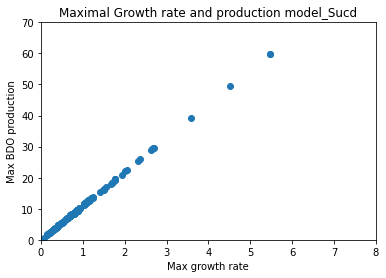

In [81]:

# And we can create a scatterplot of the production over growth to view the distribution
plt.scatter(df1.get('Max_growth'), df1.get('Max_BDO_production'))
plt.xlabel('Max growth rate')
plt.ylabel('Max BDO production')
plt.xlim(0, 8)
plt.ylim(0, 70)
plt.title('Maximal Growth rate and production model_Sucd')

plt.show()

## Model akg

In [99]:

# A loop is created that will check the max growth and the 1,4-BDO production for the different carbon sources
#Firstly, the lists which will include the reactions id, the reactions and metabolite names, the metabolites id and the MW are created :

reaction_id=[]
reaction_names=[]
carbon_name=[]
carbon_id=[]
MW=[]
for reaction in model_akg.exchanges:
    for metabolite in reaction.reactants:
        if "C" in metabolite.elements:
            reaction_id.append(reaction.id)
            reaction_names.append(reaction.name) 
            carbon_name.append(metabolite.name)
            carbon_id.append(metabolite.id)
            MW.append(metabolite.formula_weight)
# Secondly, the baseline case is being created
#That means the growth and production when in the medium there is glucose
with model_akg:
    max_base_growth = model_akg.slim_optimize()
    model_akg.objective = model_akg.reactions.EX_bdo
    max_base_production = model_akg.slim_optimize()



 
 # Now, we will loop through every carbon source in the model and observe the production of BDO.     
# We define the lists we are going to use
max_growth = [] #All the values of  the biomass growth for each Carbon source will be saved in this list
max_production = [] #All the values of the bdo production for the different carbon sources   
medium=model_akg.medium

with model_akg:
    for reaction in reaction_id:
        medium['EX_glc__D_e'] = 0
        medium[reaction]=10
        # It is very important to notice that the loop for every carbon source will take place with the concentration being equal to 10
        model_akg.medium = medium
        with model_akg:
            max_growth.append(model_akg.slim_optimize(error_value=0.))
            model_akg.objective = model_akg.reactions.EX_bdo
            max_production.append(model_akg.slim_optimize(error_value=0.))  # Determining max production
        medium[reaction]=0        





In [100]:

Yield2= []
for i in range(len(MW)) :
    Yield2.append((max_production[i]*90.14)/(10*MW[i]))
   
  

0

#### Presenting the results descendingly

In [98]:
CARBON2 = {'Reaction_name': reaction_names,
             'Reaction_ID': reaction_id,
             'Carbon_Metabolite_Name': carbon_name,
              'Carbon_Metabolite_ID': carbon_id,
            'Max_growth':max_growth,
           'Max_BDO_production': max_production,
          'MW' : MW,
          'Yield2':Yield2}
df2 = pd.DataFrame(CARBON2, columns = ['Carbon_Metabolite_ID','Max_growth', 'Max_BDO_production','Yield2'])

df2= df2[df2['Max_growth'] != 0] 
df2=df2.sort_values(by='Yield2', ascending=False).head(200) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df2)


    Carbon_Metabolite_ID    Max_growth  Max_BDO_production        Yield2
108             ocdcea_e  2.960170e+01        2.960170e+01  9.480423e-01
65               hdcea_e  2.619745e+01        2.619745e+01  9.319003e-01
101              ocdca_e  2.917617e+01        2.917617e+01  9.277689e-01
194             pacald_e  1.226128e+01        1.226128e+01  9.198877e-01
67              ttdcea_e  2.279319e+01        2.279319e+01  9.117394e-01
171               hdca_e  2.577191e+01        2.577191e+01  9.095276e-01
228              peamn_e  1.226128e+01        1.226128e+01  9.045367e-01
84               ttdca_e  2.236766e+01        2.236766e+01  8.867850e-01
185               ddca_e  1.896340e+01        1.896340e+01  8.576403e-01
119                dca_e  1.555915e+01        1.555915e+01  8.189472e-01
192               etoh_e  4.175094e+00        4.175094e+00  8.169215e-01
198               pppn_e  1.279319e+01        1.279319e+01  7.730810e-01
121               octa_e  1.215489e+01        1.215

### A graph with BDO production as a function of growth for the different carbon sourse but in the same concentration for akg model

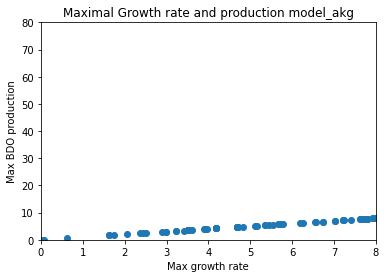

In [36]:


plt.scatter(df2.get('Max_growth'), df2.get('Max_BDO_production'))
plt.xlabel('Max growth rate')
plt.ylabel('Max BDO production')
plt.xlim(0, 8)
plt.ylim(0, 80)
plt.title('Maximal Growth rate and production model_akg')

plt.show()